In [2]:
## UAS SISTEM TEMU KEMBALI INFORMASI (STKI)

## ANGGOTA 1  : Didit Iswantoro (17.01.53.0030)
## ANGGOTA 2  : Ahmad Samsul Muarif (17.01.53.0037)
## ANGGOTA 3  : Ardi Kurniawan (17.01.53.0071)
## Kelas    : B1

In [3]:
pip install bs4

     |████████████████████████████████| 115 kB 6.4 MB/s eta 0:00:01
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=62b807dbf02a75d78d88ca3aaba7e48bdf1bbde19bdb426d95a9c270cecabf60
  Stored in directory: /home/jovyan/.cache/pip/wheels/19/f5/6d/a97dd4f22376d4472d5f4c76c7646876052ff3166b3cf71050
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

     |████████████████████████████████| 366 kB 7.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

     |████████████████████████████████| 283 kB 9.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
# Mengimport Library Beautifulsoup
from bs4 import BeautifulSoup
import requests

In [30]:
# Mengambil data sebanyak 100
start = 2033
end = 2133
array = []

for start in range(int(start), int(end)+1):
    # Merequest sumber halaman web
    page = requests.get("https://myanimelist.net/anime/" + str(start))

    # Merapikan tampilan hasil dari web yang di scraping 
    scraping = BeautifulSoup(page.content,'html.parser')

    # Sraping Title/Judul Anime
    nyoba1 = scraping.find('title')
    
    if nyoba1 is None:
        nyoba1 = "-"
    else:
        nyoba1 = nyoba1.text.replace(" - MyAnimeList.net", "").strip()

    # Scraping Popularity Anime
    nyoba4 = scraping.find('span',attrs={"class":"numbers popularity"})

    if nyoba4 is None:
        nyoba4 = 0
    else:
        nyoba4 = nyoba4.text.replace("Popularity #", "").strip()

    # Scraping Rating Anime
    nyoba5 = scraping.find('span',attrs={"itemprop":"ratingValue"})

    if nyoba5 is None:
        nyoba5 = 0
    else:
        nyoba5 = nyoba5.text

    # Scraping Deskripsi Anime
    nyoba6 = scraping.find('p',attrs={"itemprop":"description"})

    if nyoba6 is None:
        nyoba6 = "-"
    else:
        nyoba6 = nyoba6.text.strip()

    array.append([int(start), str(nyoba1), float(nyoba5), int(nyoba4), str(nyoba6)])
   
print(array)

[[2033, 'Tamala 2010: A Punk Cat in Space', 6.22, 5647, 'In the year 2010, practically one hundred percent of Cat Earth\'s GDP comes from the megacorporation Catty & Co., which is rapidly spreading across the rest of the galaxy. Here lives Tamala, a beautiful yet foul-mouthed cat, who decides to travel to the planet of her birth, Orion. After an unfortunate crash landing on the planet Q, Tamala meets Michaelangelo, a fellow cat, whom Tamala refers to as "MoiMoi."\n\r\nAs Tamala and Michaelangelo explore the planet\'s capital, Hate City—which is under martial law to separate the feuding cat and dog populations—they pass by graffiti and museum exhibits about the ancient cult of Minerva that speak of something dark and sinister. After Tamala catches the eye of the extremely violent motorcycle-riding Kentauros, she and Michaelangelo flee, but mysteries about Tamala\'s identity continue to surface. Why did Tamala originally leave Orion, and what exactly is her connection to Catty & Co.?\n\r

In [31]:
# mengambil data frame
anime_list = pd.DataFrame(array, columns=['anime_id', 'anime_title', 'anime_rating', 'anime_popularity', 'anime_description'])
# Menampilkan data frame yang sudah di ambil
print(anime_list)

     anime_id                                        anime_title  \
0        2033                   Tamala 2010: A Punk Cat in Space   
1        2034                    Lovely★Complex (Lovely Complex)   
2        2035            Eikoku Koi Monogatari Emma: Molders-hen   
3        2036                       Cosmic Baton Girl Comet-san☆   
4        2037                                Hime-chan no Ribbon   
..        ...                                                ...   
96       2129                                         True Tears   
97       2130              Kaibutsu Oujo (Princess Resurrection)   
98       2131  Bokusatsu Tenshi Dokuro-chan 2 (Bludgeoning An...   
99       2132  Inukami! The Movie: Tokumei Reiteki Sousakan K...   
100      2133                                         Mari Iyagi   

     anime_rating  anime_popularity  \
0            6.22              5647   
1            8.07               287   
2            7.88              3555   
3            7.16          

In [44]:
# menampilkan data frame dalam bentuk tabel
data = pd.DataFrame(anime_list)
data

,anime_id,anime_title,anime_rating,anime_popularity,anime_description
0,2033,Tamala 2010: A Punk Cat in Space,6.22,5647,"In the year 2010, practically one hundred perc..."
1,2034,Lovely★Complex (Lovely Complex),8.07,287,Love is unusual for Koizumi Risa and Ootani At...
2,2035,Eikoku Koi Monogatari Emma: Molders-hen,7.88,3555,"In the faraway village of Haworth, a new chapt..."
3,2036,Cosmic Baton Girl Comet-san☆,7.16,7660,Comet (12 years old in human years) is the pri...
4,2037,Hime-chan no Ribbon,7.45,5705,"Erika, the princess of the Magic Kingdom has c..."
...,...,...,...,...,...
96,2129,True Tears,7.38,782,Living under the same roof with the girl he ha...
97,2130,Kaibutsu Oujo (Princess Resurrection),7.03,1803,When Hiro Hiyorimi tries to save a beautiful y...
98,2131,Bokusatsu Tenshi Dokuro-chan 2 (Bludgeoning An...,6.71,1412,"Only more bizarre, troublesome, and funny adve..."
99,2132,Inukami! The Movie: Tokumei Reiteki Sousakan K...,7.07,3982,"In 2007, the Punishment of Sexual Perversions ..."


In [45]:
# Menghapus data yang tidak digunakan yaitu anime id dan anime desckripsi
data = data.drop(['anime_id', 'anime_description'], axis = 1)
data.head()

,anime_title,anime_rating,anime_popularity
0,Tamala 2010: A Punk Cat in Space,6.22,5647
1,Lovely★Complex (Lovely Complex),8.07,287
2,Eikoku Koi Monogatari Emma: Molders-hen,7.88,3555
3,Cosmic Baton Girl Comet-san☆,7.16,7660
4,Hime-chan no Ribbon,7.45,5705


In [47]:
# Mengambil data yang akan di klastering yaitu anime rating dan anime popularity
data_x = data.iloc[:, 1:3]
data_x.head()

,anime_rating,anime_popularity
0,6.22,5647
1,8.07,287
2,7.88,3555
3,7.16,7660
4,7.45,5705


<AxesSubplot:xlabel='anime_rating', ylabel='anime_popularity'>

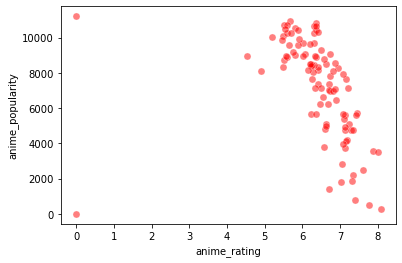

In [50]:
# Melihat persebaran data menggunakan fungsi seaborn
sns.scatterplot(x="anime_rating", y="anime_popularity", data=data, s=50, color="red", alpha = 0.5)

In [51]:
# Mengubah variabel berbentuk data frame menjadi aray
x_array = np.array(data_x)
print(x_array)

[[6.2200e+00 5.6470e+03]
 [8.0700e+00 2.8700e+02]
 [7.8800e+00 3.5550e+03]
 [7.1600e+00 7.6600e+03]
 [7.4500e+00 5.7050e+03]
 [6.7000e+00 7.3500e+03]
 [6.6200e+00 8.5190e+03]
 [6.3600e+00 8.8850e+03]
 [6.6300e+00 5.1270e+03]
 [6.6100e+00 4.8150e+03]
 [7.1700e+00 4.1700e+03]
 [7.1400e+00 4.7820e+03]
 [6.3000e+00 1.0270e+04]
 [6.3700e+00 1.0419e+04]
 [6.4000e+00 7.3590e+03]
 [7.1200e+00 5.5880e+03]
 [6.0600e+00 9.0560e+03]
 [6.6800e+00 6.2600e+03]
 [6.0200e+00 8.9270e+03]
 [6.3100e+00 9.6690e+03]
 [5.4900e+00 8.3540e+03]
 [5.1900e+00 1.0037e+04]
 [6.7200e+00 9.0800e+03]
 [5.5000e+00 8.7540e+03]
 [4.8900e+00 8.1190e+03]
 [5.4900e+00 1.0079e+04]
 [6.2000e+00 9.6490e+03]
 [6.4700e+00 6.2400e+03]
 [6.4200e+00 8.1440e+03]
 [6.4000e+00 8.3240e+03]
 [6.3000e+00 8.4640e+03]
 [6.2300e+00 8.5120e+03]
 [5.7900e+00 8.9910e+03]
 [6.0200e+00 9.6640e+03]
 [6.5000e+00 7.1440e+03]
 [6.2400e+00 8.4460e+03]
 [5.6000e+00 1.0283e+04]
 [5.6000e+00 8.8890e+03]
 [6.3700e+00 5.6770e+03]
 [5.7500e+00 9.1950e+03]


In [55]:
# Melakukan proses standarisasi pada data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.77075589, 0.50419643],
       [1.        , 0.025625  ],
       [0.97645601, 0.31741071],
       [0.88723668, 0.68392857],
       [0.92317224, 0.509375  ],
       [0.83023544, 0.65625   ],
       [0.82032218, 0.760625  ],
       [0.78810409, 0.79330357],
       [0.82156134, 0.45776786],
       [0.81908302, 0.42991071],
       [0.88847584, 0.37232143],
       [0.88475836, 0.42696429],
       [0.78066914, 0.91696429],
       [0.78934325, 0.93026786],
       [0.79306072, 0.65705357],
       [0.88228005, 0.49892857],
       [0.75092937, 0.80857143],
       [0.82775713, 0.55892857],
       [0.74597274, 0.79705357],
       [0.7819083 , 0.86330357],
       [0.6802974 , 0.74589286],
       [0.64312268, 0.89616071],
       [0.83271375, 0.81071429],
       [0.68153656, 0.78160714],
       [0.60594796, 0.72491071],
       [0.6802974 , 0.89991071],
       [0.76827757, 0.86151786],
       [0.80173482, 0.55714286],
       [0.79553903, 0.72714286],
       [0.79306072, 0.74321429],
       [0.

In [57]:
# Menentukan jumlah klaster sebanyak 5
kmeans = KMeans(n_clusters = 5, random_state=123)
# Menentukan klaster dari data
kmeans.fit(x_scaled)

KMeans(n_clusters=5, random_state=123)

In [59]:
# Mencari nilai pusat dari klaster
print(kmeans.cluster_centers_)

[[0.84731258 0.55651228]
 [0.7454625  0.83556548]
 [0.90776022 0.22969866]
 [0.         0.        ]
 [0.         1.        ]]


In [61]:
# Menampilkan hasil klaster
print(kmeans.labels_)

[0 2 2 0 0 0 1 1 0 0 2 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 0 1 4 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 2 2 0
 2 2 0 0 0 2 0 1 3 2 0 0 0 0 0 0 2 2 0 0 1 1 2 2 2 2 0]


In [63]:
# Menampilkan data klaster
data["cluster"] = kmeans.labels_
data.head()

,anime_title,anime_rating,anime_popularity,cluster
0,Tamala 2010: A Punk Cat in Space,6.22,5647,0
1,Lovely★Complex (Lovely Complex),8.07,287,2
2,Eikoku Koi Monogatari Emma: Molders-hen,7.88,3555,2
3,Cosmic Baton Girl Comet-san☆,7.16,7660,0
4,Hime-chan no Ribbon,7.45,5705,0


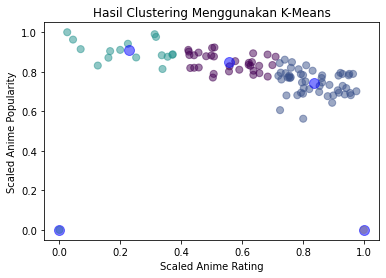

In [65]:
# Memvisualisasi data klaster menggunakan library matplotlib
fig, ax = plt.subplots()
sct = ax.scatter(x_scaled[:,1], x_scaled[:,0], s = 50,
c = data.cluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s=100, alpha=0.5);plt.title("Hasil Clustering Menggunakan K-Means")
plt.xlabel("Scaled Anime Rating")
plt.ylabel("Scaled Anime Popularity")
plt.show()